In [1]:
import json
import datetime as dt
import os
os.chdir('d:\programming_files')
datafile='yelp_academic_dataset_user.json'
user_data=list()
compliments_data=list()
elite_data=list()
friends_data=list()
votes_data=list()
with open(datafile,'r') as f:
    count=0
    for line in f:
        data=json.loads(line)
        user_id=data.get('user_id')
        name=data.get('name')
        review_count=data.get('review_count')
        average_stars=data.get('average_stars') 
        yelping_since=dt.datetime.strptime(data.get('yelping_since'),"%Y-%m").date()
        fans=data.get('fans')
        user_votes=data.get('votes')
        user_friends=data.get('friends')
        compliments=data.get('compliments')
        elite_years=data.get('elite')
        user_data.append([user_id,name,review_count,average_stars,yelping_since,fans])
        compliments_data.append([user_id,compliments])
        elite_data.append([user_id,elite_years])
        for friend in user_friends:
            friends_data.append((user_id,friend))
        #friends_data.append([user_id,user_friends])
        votes_data.append([user_id,user_votes])
        count+=1
print(count)

366715


In [2]:
votes_data[:10]

[['18kPq7GPye-YQ3LyKyAZPw', {'cool': 245, 'funny': 166, 'useful': 278}],
 ['rpOyqD_893cqmDAtJLbdog', {'cool': 9837, 'funny': 6849, 'useful': 12642}],
 ['4U9kSBLuBDU391x6bxU-YA', {'cool': 727, 'funny': 907, 'useful': 1445}],
 ['fHtTaujcyKvXglE33Z5yIw', {'cool': 5, 'funny': 1, 'useful': 11}],
 ['SIBCL7HBkrP4llolm4SC2A', {'cool': 11, 'funny': 10, 'useful': 34}],
 ['8J4IIYcqBlFch8T90N923A', {'cool': 16174, 'funny': 12453, 'useful': 16940}],
 ['wy6l_zUo7SN0qrvNRWgySw', {'cool': 43, 'funny': 35, 'useful': 86}],
 ['ysYmC-ufbdmVEX9yAv-VEQ', {'cool': 25, 'funny': 39, 'useful': 38}],
 ['WPOKvkacSKHx_bIG1alFiA', {'cool': 30, 'funny': 25, 'useful': 118}],
 ['UTS9XcT14H2ZscRIf0MYHQ', {'cool': 39, 'funny': 40, 'useful': 207}]]

In [3]:
#List of cool users
cool_users=list()
for v in votes_data:
    if v[1]['cool'] and  v[1]['cool'] > 10000:
        cool_users.append(v[0])

In [4]:
#List of funny users
funny_users=list()
for v in votes_data:
    if v[1]['funny'] > 9000:
        funny_users.append(v[0])


In [5]:
#List of useful users
useful_users=list()
for v in votes_data:
    if v[1]['useful'] > 12000:
        useful_users.append(v[0])

In [6]:
print(len(cool_users))
print(len(funny_users))
print(len(useful_users))


83
80
87


In [28]:
popular_users=[x for x in funny_users if x in cool_users and x in useful_users]
len(popular_users)

64

In [8]:
popular_users_friends = [(x[0],x[1]) for x in friends_data if x[0] in popular_users and x[1] in popular_users]
len(popular_users_friends)

1370

In [9]:
#List of users with high number of reviews
high_review_users=[x[0] for x in user_data if x[2]>1750]
len(high_review_users)

82

In [10]:
high_review_friends=[(x[0],x[1]) for x in friends_data if x[0] in high_review_users and x[1] in high_review_users]

In [11]:
len(high_review_friends)

1108

In [12]:
import networkx as nx


In [51]:
popular_friends_graph=nx.Graph()
popular_friends_graph.add_edges_from(popular_users_friends)
print(popular_friends_graph.number_of_nodes(),popular_friends_graph.number_of_edges())

63 685


In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as py


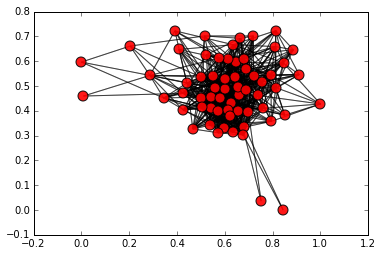

In [64]:
pos1=nx.spring_layout(popular_friends_graph)

nx.draw_networkx_nodes(popular_friends_graph,pos1,
                      node_color='r',
                      node_size=100,
                      alpha=0.9)
nx.draw_networkx_edges(popular_friends_graph,pos1,
                      edgelist=popular_users_friends,
                      width=1
                       ,alpha=0.5,edge_color='black')
py.show()

In [41]:
highreview_friends_graph=nx.Graph()
highreview_friends_graph.add_edges_from(high_review_friends)
print(highreview_friends_graph.number_of_nodes(),highreview_friends_graph.number_of_edges())

81 554


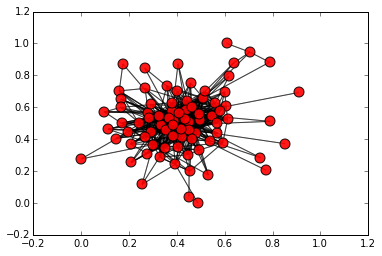

In [66]:
pos2=nx.spring_layout(highreview_friends_graph)
nx.draw_networkx_nodes(highreview_friends_graph,pos2,
                      node_color='r',
                      node_size=100,
                      alpha=0.9)
nx.draw_networkx_edges(highreview_friends_graph,pos2,
                       edgelist=high_review_friends,
                      width=1,
                      alpha=0.5,edge_color='black')

In [105]:
connected_popular=list()
for comp in nx.connected_components(popular_friends_graph):
    connected_popular.append(comp)

len(connected_popular[0])/len(popular_users)
#connected_popular

0.984375

In [77]:
connected_review=list()
for comp in nx.connected_components(highreview_friends_graph):
    connected_review.append(comp)
len(connected_review[0])/len(high_review_users)

0.9878048780487805

In [79]:
max(nx.degree(popular_friends_graph).values())

40

In [80]:
max(nx.degree(highreview_friends_graph).values())

50

In [81]:
nx.average_clustering(popular_friends_graph)

0.5932994030317361

In [82]:
nx.average_clustering(highreview_friends_graph)

0.5061741102385232

In [108]:
from networkx.algorithms.centrality import closeness_centrality, communicability
cc1=list(closeness_centrality(popular_friends_graph).values())
print(max(cc1),min(cc1))

0.7380952380952381 0.3780487804878049


In [109]:
cc2=list(closeness_centrality(highreview_friends_graph).values())
print(max(cc2),min(cc2))

0.7142857142857143 0.272108843537415


In [110]:
from networkx.algorithms.distance_measures import center
print(len(center(popular_friends_graph))/len(popular_users))
print(len(center(popular_friends_graph)))

0.078125
5


In [101]:
len(center(highreview_friends_graph))/len(high_review_users)

0.2804878048780488